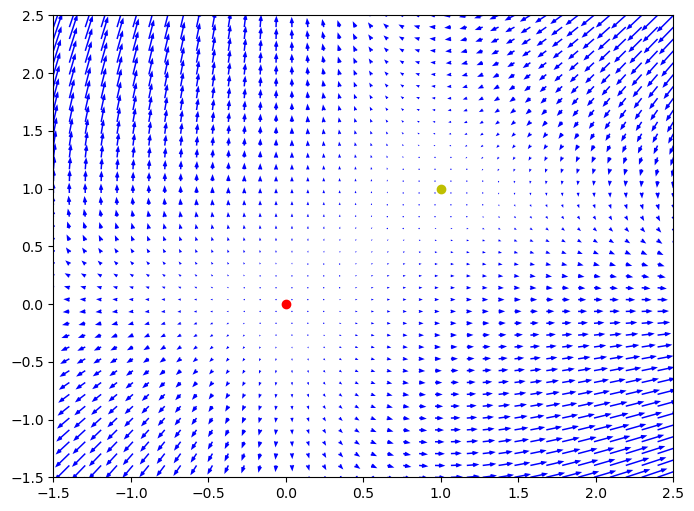

In [10]:
# Definir el sistema de ecuaciones diferenciales
def sistema(t, z):
    x, y = z
    dxdt = x - x * y
    dydt = y - x * y
    return [dxdt, dydt]

# Crear una malla de puntos (grid) para el diagrama de fase
x_vals = np.linspace(-1.5, 2.5, 40)  # Rango de valores de x
y_vals = np.linspace(-1.5, 2.5, 40)  # Rango de valores de y
X, Y = np.meshgrid(x_vals, y_vals)  # Crear la malla de coordenadas

# Inicializar el campo de vectores
DX, DY = np.zeros(X.shape), np.zeros(Y.shape)

# Calcular el campo de vectores
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        x_dot, y_dot = sistema(0, [X[i, j], Y[i, j]])
        DX[i, j] = x_dot
        DY[i, j] = y_dot

# Graficar el campo de direcciones
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, DX, DY, color='blue', headlength=4)

plt.xlim(-1.5, 2.5)
plt.ylim(-1.5, 2.5)

# Marcar los puntos críticos en el gráfico
plt.plot(0, 0, 'ro', label='Punto crítico (0,0)')
plt.plot(1, 1, 'yo', label='Punto crítico (1,1)')

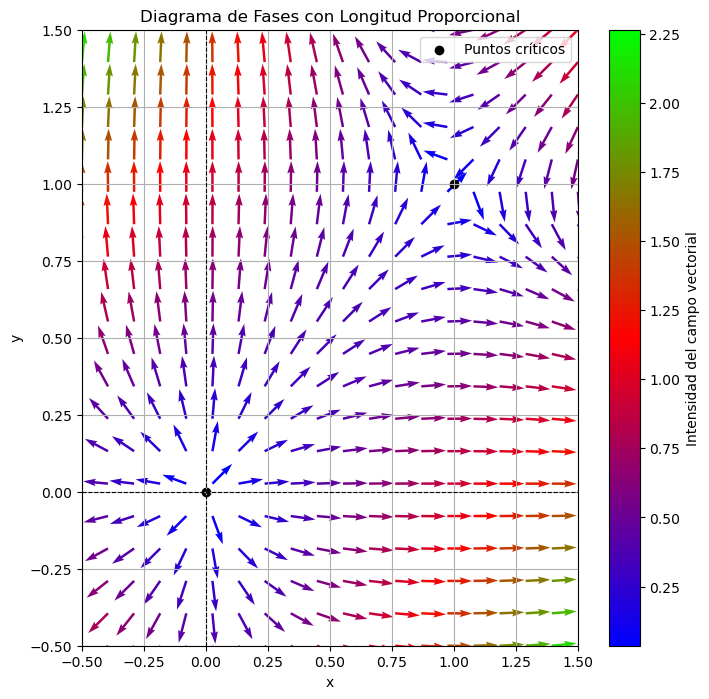

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones diferenciales
def sistema(X, Y):
    x_dot = X - X * Y
    y_dot = Y - X * Y
    return x_dot, y_dot

# Crear una malla de puntos en el plano
x = np.linspace(-0.5, 1.5, 20)
y = np.linspace(-0.5, 1.5, 20)
X, Y = np.meshgrid(x, y)

# Calcular las derivadas en cada punto de la malla
x_dot, y_dot = sistema(X, Y)

# Calcular la magnitud del campo vectorial para normalizar
magnitude = np.sqrt(x_dot**2 + y_dot**2)

# Normalizar las flechas para que tengan la misma longitud
x_dot_norm = x_dot / magnitude
y_dot_norm = y_dot / magnitude

# Crear el diagrama de fases
plt.figure(figsize=(8, 8))
quiver = plt.quiver(
    X, Y, 
    x_dot_norm, y_dot_norm, 
    magnitude, 
    cmap='brg', 
    scale=10,         # Ajusta la escala global de las flechas
    scale_units='xy', # La escala se aplica a las unidades de la malla
    width=0.005       # Ancho de las flechas para visibilidad
)
plt.colorbar(quiver, label='Intensidad del campo vectorial')

# Configurar los ejes
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diagrama de Fases con Longitud Proporcional')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Representar los puntos críticos
plt.scatter([0, 1], [0, 1], color='black', label='Puntos críticos')
plt.legend()

plt.grid()
plt.show()


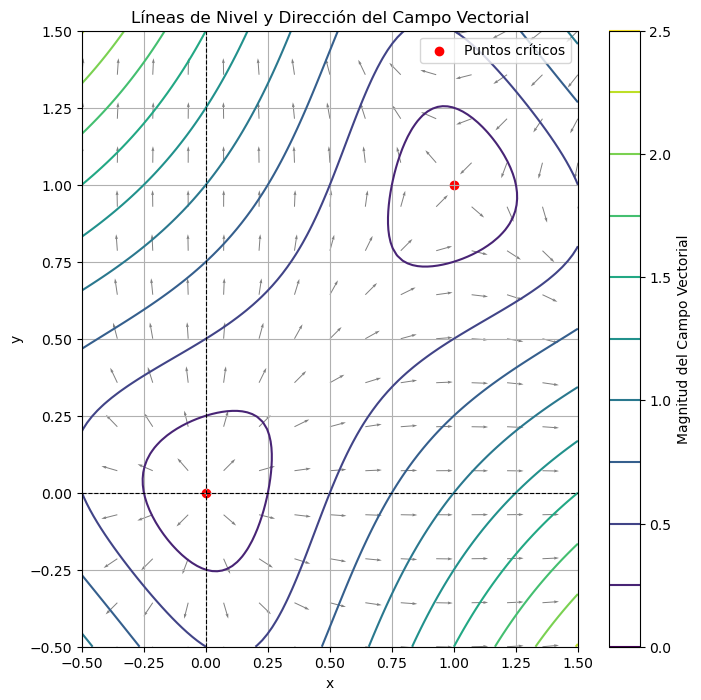

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones diferenciales
def sistema(X, Y):
    x_dot = X - X * Y
    y_dot = Y - X * Y
    return x_dot, y_dot

# Crear una malla para las flechas (menos densa) y para las líneas de nivel (más densa)
x = np.linspace(-0.5, 1.5, 15)  # Menos puntos para quiver
y = np.linspace(-0.5, 1.5, 15)
X, Y = np.meshgrid(x, y)

x_dense = np.linspace(-0.5, 1.5, 100)  # Más puntos para contour
y_dense = np.linspace(-0.5, 1.5, 100)
X_dense, Y_dense = np.meshgrid(x_dense, y_dense)

# Calcular las derivadas en cada punto
x_dot, y_dot = sistema(X, Y)
x_dot_dense, y_dot_dense = sistema(X_dense, Y_dense)

# Calcular la magnitud del campo vectorial
magnitude_dense = np.sqrt(x_dot_dense**2 + y_dot_dense**2)

# Normalizar las flechas para mostrar sólo la dirección
x_dot_norm = x_dot / np.sqrt(x_dot**2 + y_dot**2)
y_dot_norm = y_dot / np.sqrt(x_dot**2 + y_dot**2)

# Crear la figura
plt.figure(figsize=(8, 8))

# Líneas de nivel de la magnitud del campo vectorial
contour = plt.contour(X_dense, Y_dense, magnitude_dense, levels=10, cmap='viridis')
plt.colorbar(contour, label='Magnitud del Campo Vectorial')

# Flechas con dirección normalizada
plt.quiver(
    X, Y, 
    x_dot_norm, y_dot_norm, 
    color='gray',        # Color gris
    scale=30,            # Longitud reducida
    width=0.002          # Grosor reducido
)

# Configurar los ejes
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Líneas de Nivel y Dirección del Campo Vectorial')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Representar los puntos críticos
plt.scatter([0, 1], [0, 1], color='red', label='Puntos críticos')
plt.legend()

plt.grid()
plt.show()


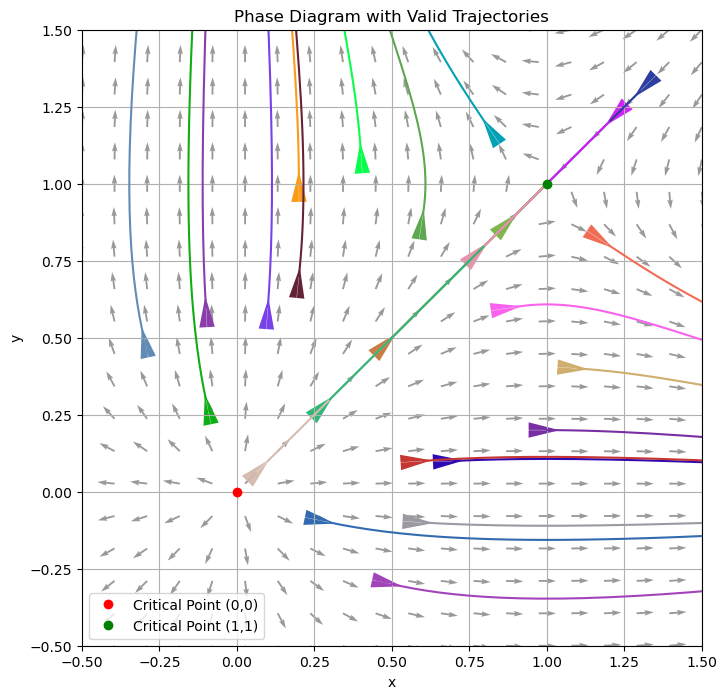

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definimos el sistema de ecuaciones diferenciales
def system(state, t):
    x, y = state
    dxdt = x - x * y
    dydt = y - x * y
    return [dxdt, dydt]

# Creamos el espacio para el campo vectorial
x = np.linspace(-0.5, 1.5, 20)
y = np.linspace(-0.5, 1.5, 20)
X, Y = np.meshgrid(x, y)

# Calculamos las derivadas en cada punto
dX = X - X * Y
dY = Y - X * Y

# Normalizamos las derivadas para que todas las flechas tengan el mismo tamaño
magnitude = np.sqrt(dX**2 + dY**2)
dX /= magnitude
dY /= magnitude

# Configuramos el tiempo para las trayectorias
t = np.linspace(0, 10, 200)

# Condiciones iniciales para trayectorias representativas
initial_conditions = [
    [0.1, 0.1], [0.9, 0.9], [1.2, 0.8], [0.8, 1.2],
    [0.2, 1.0], [1.0, 0.2], [0.5, 0.5], [0.3, 0.3],
    [0.7, 0.1], [1.1, 0.4], [0.4, 1.1], [0.2, 0.7],
    [1.3, 1.3], [0.6, 0.9], [0.9, 0.6], [0.1, 0.6],
    [0.6, 0.1], [1.0, 1.0], [1.2, 1.2], [0.8, 0.8],
    [0.6, -0.1], [-0.1, 0.6], [0.3, -0.1], [-0.1, 0.3],
    [0.5, -0.3], [-0.3, 0.5],
]

# Creamos la figura y los ejes
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, dX, dY, color="gray", alpha=0.8)

# Dibujamos trayectorias representativas con flechas al principio
for ic in initial_conditions:
    trajectory = odeint(system, ic, t)
    # Dibujar la trayectoria completa
    color = np.random.rand(3,)  # Generar un color aleatorio
    plt.plot(trajectory[:, 0], trajectory[:, 1], lw=1.5, color=color)
    # Añadir una flecha al principio
    plt.arrow(
        trajectory[0, 0], trajectory[0, 1],  # Inicio de la flecha
        trajectory[1, 0] - trajectory[0, 0],  # Componente x de la flecha
        trajectory[1, 1] - trajectory[0, 1],  # Componente y de la flecha
        shape='full', lw=0, length_includes_head=True,
        head_width=0.05, head_length=0.1, color=color
    )

# Añadimos los puntos críticos
plt.plot(0, 0, 'ro', label='Critical Point (0,0)')
plt.plot(1, 1, 'go', label='Critical Point (1,1)')

# Configuramos el gráfico
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Diagram with Valid Trajectories')
plt.legend()
plt.grid()
plt.show()

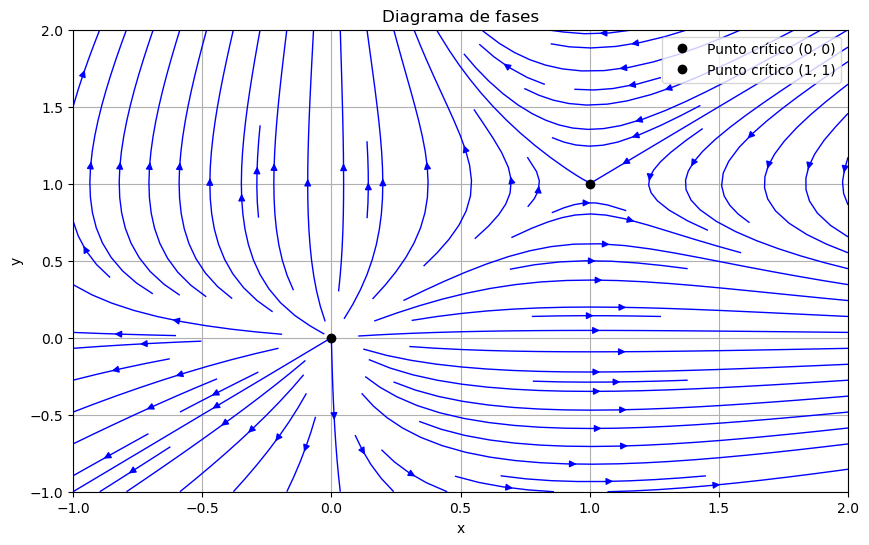

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir el sistema de ecuaciones diferenciales
def sistema(z, t):
    x, y = z
    dxdt = x - x * y
    dydt = y - x * y
    return [dxdt, dydt]

# Crear una malla de puntos para el diagrama de fases (campo vectorial)
Y, X = np.mgrid[-1:2:10j, -1:2:10j]  # Malla de puntos en el plano xy
U = X - X * Y  # Derivada de x
V = Y - X * Y  # Derivada de y

# Graficar el campo vectorial (diagrama de fases)
plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, U, V, color='b', linewidth=1)

# Marcar los puntos críticos en el gráfico
plt.plot(0, 0, 'ko', label='Punto crítico (0, 0)')
plt.plot(1, 1, 'ko', label='Punto crítico (1, 1)')

# Configuración del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diagrama de fases')
plt.legend()
plt.grid(True)
plt.show()